<a href="https://colab.research.google.com/github/averrise/averrise.github.io/blob/master/_posts/fastai%26pytorch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
!pip install -Uqq fastai
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

FAST AI 설치

In [250]:
# 필요한 라이브러리 임포트
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

MNIST 샘플 다운로드


In [251]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

LS 메소드는 L클래스 객체를 반환 L은LIST를 확장하여 목록과 목록의 개수를 함께 출력함


In [252]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

3,7을 레이블 이라고 표현'

In [253]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

파일 순서가 항상 같도록 정렬
sorted뒤에 ()를 안 붙이면 메소드 판정

In [254]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [255]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [256]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

[4:10,4:10]은 좌측 상단의 범위를 탐색 위 아래, 좌우

In [257]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


**는 Python의 딕셔너리(dictionary)에 사용되는 특별한 구문으로, 딕셔너리에 있는 키-값 쌍을 함수 호출 시 인자로 전달할 때 사용됩니다. 이를 키워드 인자(unpacking)라고도 합니다.

In [258]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
threes_tensors = [tensor(Image.open(o)) for o in threes]

len(seven_tensors), len(threes_tensors)

(6265, 6131)

모든 이미지를 감는 텐서 구현
텐서는 픽셀 하나하나 의미

In [259]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(threes_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [260]:
len(stacked_threes.shape)

3

In [261]:
stacked_threes.ndim

3

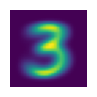

In [262]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

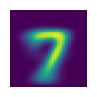

In [263]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

<Axes: >

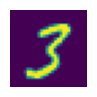

In [264]:
a_3 = stacked_threes[6000]
show_image(a_3)

In [265]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1319), tensor(0.2389))

In [266]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1334), tensor(0.2608))

In [267]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1334), tensor(0.2608))

In [268]:
data = [[1,2,3], [4,5,6]]
arr = array(data)
tns = tensor(data)

In [269]:
tns[1]

tensor([4, 5, 6])

In [270]:
tns[:,0]

tensor([1, 4])

In [271]:
tns[1,1:3]

tensor([5, 6])

In [272]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [273]:
tns.type()

'torch.LongTensor'

In [274]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [275]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in  (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

픽셀이 1010개가 아니라 관련 이미지가 1010개

In [276]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1319)

In [277]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1973, 0.1181, 0.1080,  ..., 0.1207, 0.1487, 0.1222]),
 torch.Size([1010]))

브로드 캐스팅이 일어나 mean3가 valid 텐서보다 작은데도 불구하고 오류가 일어나지 않음

In [278]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x, mean7)

입력 노름이 3보다 7에 가까우면 false를 반환


In [279]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2


(tensor(0.9168), tensor(0.9854), tensor(0.9511))

정확도를 검사

In [280]:
def pr_three(x,w): return (x*w).sum()

SGD **시작** 위 함수는 3이 될 확률

In [281]:
def f(x): return x**2

In [282]:
import numpy as np
import matplotlib.pyplot as plt

In [283]:
def plot_function(f, start, end, k):
    x = np.linspace(start, end, 1000)
    y = f(x)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('x**2')
    plt.scatter(k, f(k), color = 'red')
    plt.title('Plot of ' + str(f))
    plt.grid(True)
    plt.show()

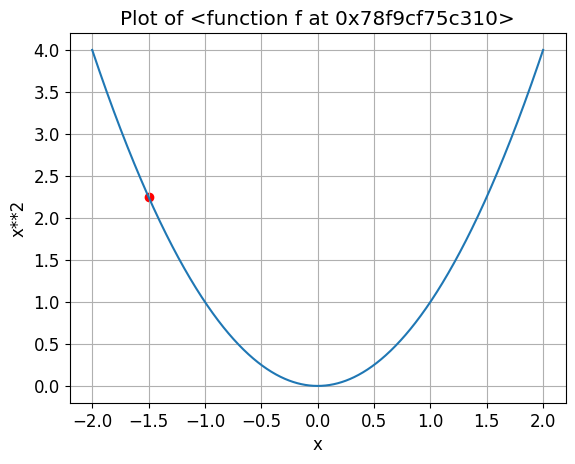

In [284]:
plot_function(f, -2, 2, -1.5)

In [285]:
xt = tensor(3.).requires_grad_()

기울기를 구

requires_grad_()
```

하는 함수

In [286]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [287]:
yt.backward()

In [288]:
xt.grad

tensor(6.)

In [289]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [290]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [291]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [292]:
time = torch.arange(0,20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

SGD를 활용한 시작부터 끝까지를 보여주는 예제

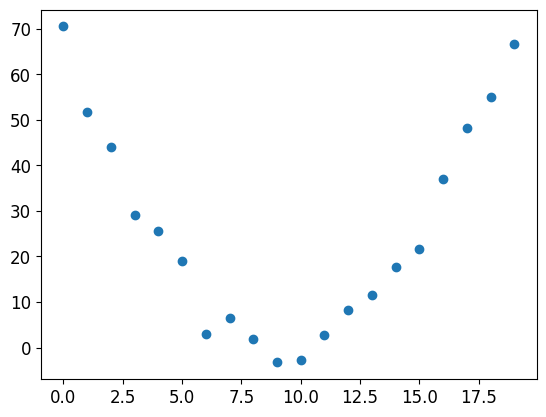

In [293]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2+1
plt.scatter(time,speed);

In [294]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [295]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

회귀에서는 mse를 많이 사용한다. 미분 가능성: MSE는 간단하고 미분 가능한 함수입니다. 이로 인해 경사 하강법(GD)과 같은 최적화 알고리즘을 사용하여 모델의 가중치를 업데이트하는 데에 용이합니다.

제곱 오차: MSE는 오차를 제곱하여 계산합니다. 이로 인해 오차가 큰 값에 더 큰 패널티를 주게 되어, 오차의 크기에 따라 가중치가 조절되는 효과를 가집니다. 오차를 제곱하기 때문에 양수 값으로 평가되며, 오차의 절대값보다 큰 오차에 더 많은 영향을 받습니다.

이상치에 덜 민감함: MSE는 이상치(outlier)에 상대적으로 덜 민감합니다. 이상치는 실제 값과 예측 값 간의 큰 차이를 가지는 데이터 포인트를 의미합니다. MSE는 오차를 제곱하고 평균을 취하기 때문에 이상치에 대한 영향을 감소시킵니다.

최소화 목표: MSE는 오차를 최소화하는 것이 목표입니다. 회귀에서는 실제 값과 예측 값의 차이를 최소화하는 것이 중요합니다. MSE는 이러한 목표를 달성하는 데에 적합한 지표입니다.

In [296]:
params = torch.randn(3).requires_grad_()

파이토피를 사용하여 3개의 랜덤한 숫자로 이루어진 텐서를 생성

In [297]:
preds = f(time, params)

시간에 따른 에측값 반환

In [298]:
def show_preds(preds, ax = None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color = 'red')
  ax.set_ylim(-300, 100)

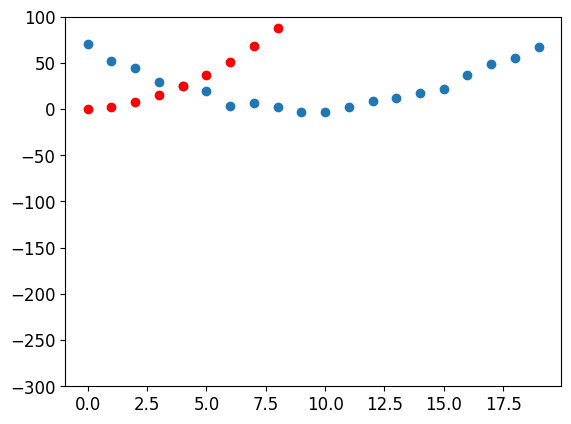

In [299]:
show_preds(preds)

In [300]:
loss = mse(preds, speed)
loss

tensor(193.8673, grad_fn=<SqrtBackward0>)

In [301]:
loss.backward()
params.grad *(1e-5)

tensor([1.6625e-03, 1.0737e-04, 6.9689e-06])

함수에 넣어서 결과값을 받은다음 backward로 기울기를 계산해야함 mse도 함수이기 때문

In [302]:
params

tensor([ 1.1989,  1.3474, -0.0660], requires_grad=True)

In [303]:
lr = 1e-4
params.data -= lr * params.grad.data
params.grad = None

params.data -= lr * params.grad.data 는 데이터를 수정 학습률을 통해서

In [304]:
preds = f(time,params)
mse(preds, speed)

tensor(191.0923, grad_fn=<SqrtBackward0>)

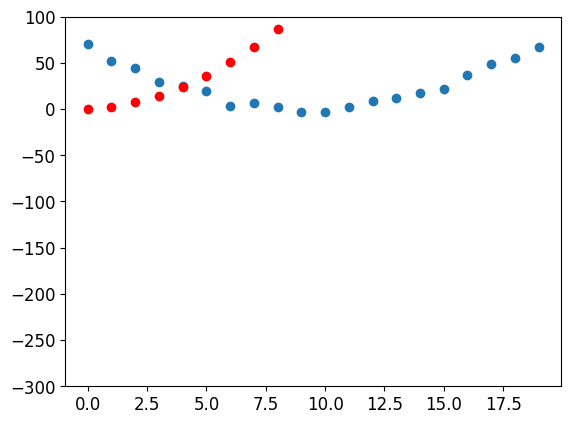

In [305]:
show_preds(preds)

In [306]:
def apply_step(params, prn=True):
  preds = f(time,params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [307]:
for i in range(10): apply_step(params)

191.09226989746094
188.31866455078125
185.546630859375
182.7761993408203
180.0073699951172
177.2403564453125
174.4751434326172
171.7118377685547
168.9505615234375
166.19139099121094


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

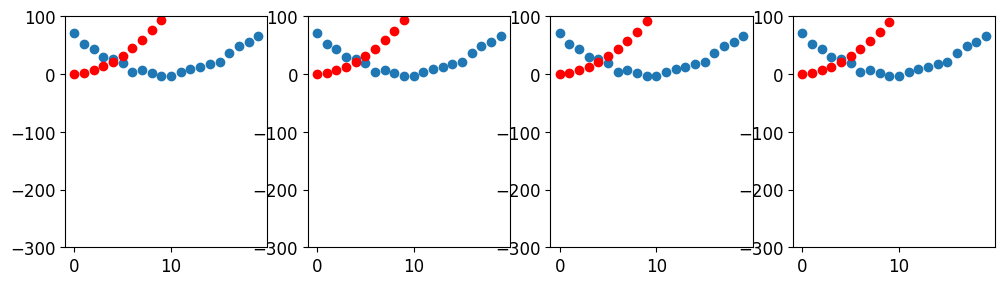

In [308]:
_,axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout

이제부터 MNist 손실 함수에 대해서 공부한다

In [309]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

3차원인 stacked_threes와 stacked_sevens를 cat으로 붙인뒤 1차원으로 펼침

In [310]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

threes의 개수만큼 [1]을 배열 sevens만큼 [0]을 배열 그리고 unsqueeze를 통해 한줄로 만듬

In [311]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [312]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [313]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))

In [314]:
bias = init_params(1)

In [315]:
(train_x[0]*weights.T).sum()+bias

tensor([12.2414], grad_fn=<AddBackward0>)

In [316]:
def linear1(xb):return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[12.2414],
        [10.7221],
        [ 9.2579],
        ...,
        [13.0832],
        [16.5547],
        [ 9.9822]], grad_fn=<AddBackward0>)

In [317]:
corrects = (preds>.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [318]:
corrects.float().mean().item()

0.461923211812973

In [319]:
preds = linear1(train_x)
((preds>0.5).float() == train_y).float().mean().item()

0.461923211812973

In [320]:
trgts = tensor([1,0,1])
prds = tensor([0.9, 0.4, 0.2])

In [321]:
def mnist_loss(predictions, targets):
  return  torch.where(targets == 1, 1 - predictions, predictions).mean()

In [322]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [323]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [324]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

In [325]:
def sigmoid(x): return 1/(1+torch.exp(-x))

시그모이드 함수

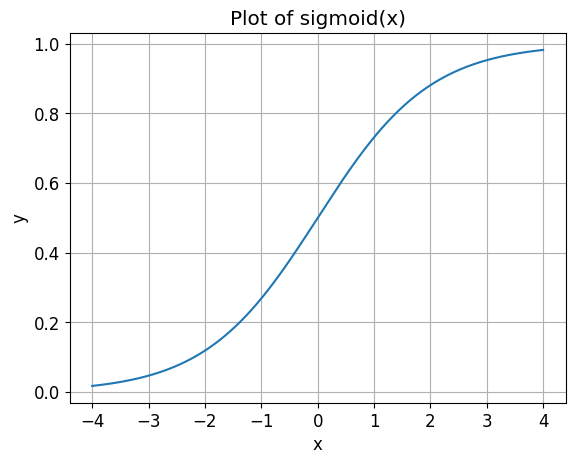

In [326]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_function(func, min_val, max_val):
    x = torch.linspace(min_val, max_val, 1000)
    y = func(x)

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Plot of {func.__name__}(x)')
    plt.grid(True)
    plt.show()

# 시그모이드 함수를 시각화
plot_function(torch.sigmoid, min_val=-4, max_val=4)

In [327]:
def mnist_loss(predictions, targets):
  predictioins = predictions.sigmoid()
  return torch.where(targets == 1, 1-predictions, predictions).mean()

손실함수를 쓰는 이유: loss함수는 예측이 항상 0과 1 사이라고 예측하기 때문이다

미니 배치 사이즈 고르는법

In [328]:
coll = range(15)
dl = DataLoader(coll, batch_size = 5, shuffle = True)
list(dl)

[tensor([ 1,  8, 13,  4,  3]),
 tensor([14,  5, 11,  6,  9]),
 tensor([10,  0,  7,  2, 12])]

In [329]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [330]:
dl = DataLoader(ds, batch_size=6, shuffle = True)
list(dl)

[(tensor([ 0, 15,  8, 11, 22, 19]), ('a', 'p', 'i', 'l', 'w', 't')),
 (tensor([ 7,  6,  2,  1, 10,  5]), ('h', 'g', 'c', 'b', 'k', 'f')),
 (tensor([25,  3,  9, 18, 14, 20]), ('z', 'd', 'j', 's', 'o', 'u')),
 (tensor([13, 16, 24, 21, 17, 23]), ('n', 'q', 'y', 'v', 'r', 'x')),
 (tensor([ 4, 12]), ('e', 'm'))]

In [331]:
weights = init_params((28*28,1))
bias = init_params(1)

In [332]:
dl = DataLoader(dset, batch_size = 256)
xb, yb =first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [333]:
valid_dl = DataLoader(valid_dset, batch_size = 256)

In [334]:
batch = train_x[:4]
batch.shape

preds = linear1(batch)
preds

loss = mnist_loss(preds, train_y[:4])
loss

tensor(-0.2851, grad_fn=<MeanBackward0>)

In [335]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.1511), tensor([-1.]))

In [336]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [337]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.3022), tensor([-2.]))

In [338]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.4534), tensor([-3.]))

In [339]:
weights.grad.zero_()
bias.grad.zero_();

In [340]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [341]:
(preds>0.5).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [ True]])

In [342]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct =(preds > 0.5) == yb
  return correct.float().mean()

In [343]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [344]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.5402

In [345]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9558

In [346]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.9553 0.9543 0.9538 0.9538 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 

옵티마이저 만들기

In [347]:
linear_model = nn.Linear(28*28, 1)

In [348]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [349]:
class BasicOptim:
  def __init__(self, params, lr): self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params : p.grad = None

In [350]:
opt = BasicOptim(linear_model.parameters(), lr)

In [351]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [352]:
validate_epoch(linear_model)

0.4314

In [353]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end =' ')


In [354]:
train_model(linear_model, 20)

0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 

In [355]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)


0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 0.9533 

In [356]:
dls = DataLoaders(dl, valid_dl)

In [357]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func = SGD, loss_func = mnist_loss, metrics=batch_accuracy)

In [358]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,-83.053146,-335.861481,0.953386,00:00
1,-309.426300,-672.178345,0.953386,00:00
2,-570.814148,-1008.495117,0.953386,00:00
3,-855.067627,-1344.811890,0.953386,00:00
4,-1152.498169,-1681.128784,0.953386,00:00
5,-1456.831299,-2017.445801,0.953386,00:00
6,-1764.535522,-2353.762695,0.953386,00:00
7,-2073.804199,-2690.079346,0.953386,00:00
8,-2383.772949,-3026.396484,0.953386,00:00
9,-2694.045410,-3362.713135,0.953386,00:00


In [359]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

@는 행렬의 곱셈 그리고 res.max는 relu함수

In [360]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

In [361]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [365]:
learn = Learner(dls, simple_net, opt_func = SGD, loss_func = mnist_loss, metrics = batch_accuracy)

learn.fit(5, 0.01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,nan,nan,0.504416,00:00
1,nan,nan,0.504416,00:00
2,nan,nan,0.504416,00:00
3,nan,nan,0.504416,00:00
4,nan,nan,0.504416,00:00


plt.plot

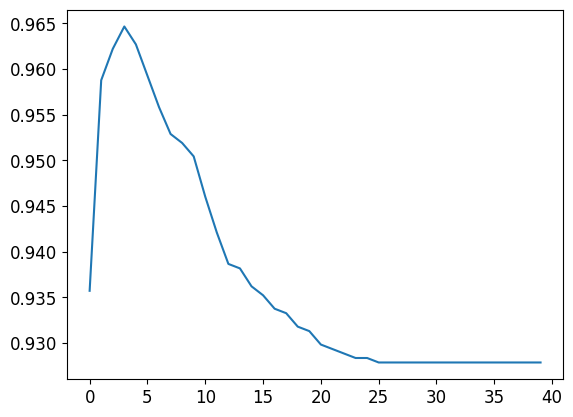

In [363]:
plt.plot(L(learn.recorder.values).itemgot(2))